In [88]:
import http.client
import requests
import pandas as pd
import io
from datetime import datetime, timedelta
import matplotlib as plt
import toolkit as tlk
import tkinter as tk
from tkinter import filedialog
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', None)

# Create an empty dataframe or import the exsisting one
finalData = pd.DataFrame(columns = ["Ticker", "Price Jump Date", "Days Till Jump", "Buy Price", "1d Av. Rets, %", "3d Av. Rets, %", "1w Av. Rets, %", "1M Av. Rets, %", "Current Rets, %", "Price Data",])
#finalData = pd.read_pickle('/Users/igorcherepanov/Downloads/Table.csv')

# Import the existing one to optimize the number of requests to Yahoo Finance via API
#finalData = pd.read_pickle('/Users/igorcherepanov/Downloads/Table.csv')

#root = tk.Tk()
#root.withdraw()
#file_path = filedialog.askopenfilename()
file_path = '/Users/igorcherepanov/Downloads/List of Shell Companies or SPACs.csv' 
df = pd.read_csv (file_path) # Import file containing the list of SPACs

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
tlk.connect()

In [89]:
spac_list = df["Symbol"][110:].tolist()
spac_list.remove("GIX^")
for ticker in spac_list:
    try:
        finalData = tlk.get_chart(ticker, "60m", "1y", finalData)
        print(ticker)
    except KeyError:
        continue
finalData.sort_values("3d Rets, %", ascending = False)
finalData.to_pickle('/Users/igorcherepanov/Downloads/Table.csv')

WPF
LGVW
JWS
GIK
SOAC
CGRO
IPOB
CHAQ
PCPL
IPOC
NOVS
ROCH
LOAK
GNRS
DFPH
NBAC
FEAC
DMYT


KeyboardInterrupt: 

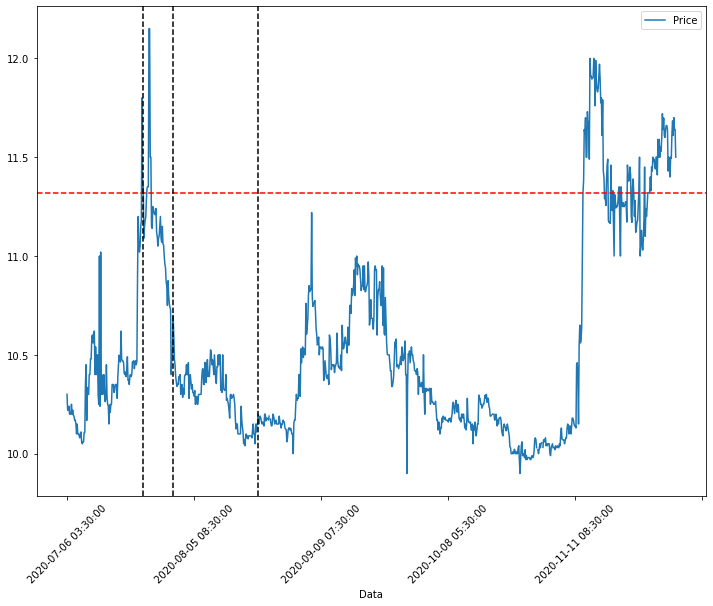

In [38]:
ax = tlk.plot_chart("JWS", finalData)

In [5]:
finalData

,Ticker,Price Jump Date,Days Till Jump,Buy Price,"1d Av. Rets, %","3d Av. Rets, %","1w Av. Rets, %","1M Av. Rets, %","Current Rets, %",Price Data
0,WPF,Not Found,No Jump,NaN,NaN,NaN,NaN,None,NaN,Data Price 0 2020-07-1...
1,LGVW,"November 20, 2020",130,$10.25,16.30,17.71,45.72,None,49.07,Data Price 0 2020-07-1...
2,JWS,"July 24, 2020",18,$11.32,0.87,0.93,-1.93,-7.16,1.59,Data Price 0 2020-07-0...
3,GIK,"November 27, 2020",147,$11.91,3.16,3.16,None,None,0.25,Data Price 0 2020-07-0...
4,SOAC,Not Found,No Jump,NaN,None,None,None,None,None,Data Price 0 2020-06...
5,CGRO,Not Found,No Jump,NaN,None,None,None,None,None,Data Price 0 2020-06-2...
6,IPOB,"July 17, 2020",28,$12.15,-1.34,-1.34,-0.56,-5.92,71.19,Data Price 0 2020-06...
7,CHAQ,Not Found,No Jump,NaN,None,None,None,None,None,Data Price 0 2020-06-2...
8,PCPL,Not Found,No Jump,NaN,None,None,None,None,None,Data Price 0 2020-06-1...
9,IPOC,"September 15, 2020",94,$11.85,1.54,2.82,3.50,-0.39,-13.50,Data Price 0 2020-06...


In [13]:
        url = "https://apidojo-yahoo-finance-v1.p.rapidapi.com/stock/v2/get-chart" # Making request to the Rakouten API 

        querystring = {"region":"US","interval":"60m","symbol":"LOAK","range":"6mo"}

        headers = {
        'x-rapidapi-host': "apidojo-yahoo-finance-v1.p.rapidapi.com",
        'x-rapidapi-key': "bea278beefmsh674fb2d3881fe7ep1dd4f6jsndff4801d1186"
        }

        response = requests.request("GET", url, headers=headers, params=querystring) # Getting response
           
        rawData = response.json() # deconding data by means of the built-in solution JSON
        time = rawData["chart"]["result"][0]["timestamp"]

        for i in range(0,len(time),1):
            time[i] = datetime.fromtimestamp(time[i]).strftime("%Y-%m-%d %I:%M:%S") # Converting time from epoches to the readible format
            prices = rawData["chart"]["result"][0]["indicators"]["quote"][0]["close"]
            localData = pd.DataFrame({
            "Data": time,
            "Price": prices
            })
             if  localData["Price"].dropna()[0] > 12: # If the chart starts with the price higher than the entry threshold -> skip this company
            print("The price starts higher than the entry threshold")
            return(finalData)
    

In [95]:
finalData.sort_values("Price Jump Date", ascending = False)

,Ticker,Price Jump Date,Days Till Jump,Buy Price,"1d Av. Rets, %","3d Av. Rets, %","1w Av. Rets, %","1M Av. Rets, %","Current Rets, %",Price Data
10,NOVS,"September 29, 2020",108,$12.15,0.20,-2.13,-4.51,-9.23,4.69,Data Price 0 2020-06-1...
9,IPOC,"September 15, 2020",94,$11.85,1.54,2.82,3.50,-0.39,-13.50,Data Price 0 2020-06...
12,LOAK,"November 30, 2020",181,$12.00,3.26,None,None,None,19.67,Data Price 0 2020-06-0...
3,GIK,"November 27, 2020",147,$11.91,3.16,3.16,None,None,0.25,Data Price 0 2020-07-0...
11,ROCH,"November 27, 2020",136,$11.00,4.04,4.04,None,None,3.82,Data Price 0 2020-07-1...
15,NBAC,"November 24, 2020",206,$11.76,1.78,26.29,33.50,None,23.21,Data Price 0 2020-05...
1,LGVW,"November 20, 2020",130,$10.25,16.30,17.71,45.72,None,49.07,Data Price 0 2020-07-1...
14,DFPH,Not Found,No Jump,NaN,None,None,None,None,None,Data Price 0 2020-06-0...
13,GNRS,Not Found,No Jump,NaN,None,None,None,None,None,Data Price 0 2020-05-2...
0,WPF,Not Found,No Jump,NaN,NaN,NaN,NaN,None,NaN,Data Price 0 2020-07-1...


In [87]:
tlk.get_date_index(localData, start_date_index, plus_days = 2)

966

In [84]:
max_date_dataobject + timedelta(days = 1)

datetime.datetime(2020, 12, 3, 11, 0)

In [291]:
def get_date_index(localData, start_date_index, plus_days = None): 
    
    if start_date_index == None:
        print("Here")
        
    else:
        start_date_dataobject = datetime.strptime(localData["Data"].iloc[start_date_index], "%Y-%m-%d %I:%M:%S")
        max_date = localData["Data"].iloc[-1]
        max_date_dataobject = datetime.strptime(max_date, "%Y-%m-%d %I:%M:%S")
        target_date_dataobject = start_date_dataobject + timedelta(days = plus_days)
        
        if  max_date_dataobject + timedelta(days = 1) < target_date_dataobject:
            return(None)
            print("Here2")
        else:   
        
     # The following error detector accounts for weekends or holidays and absence of data these days
    
            date_index = None
            i=0
        
            while date_index == None:
                try:
                    print("Here3")
                    target_date_dataobject = start_date_dataobject + timedelta(days = plus_days+i)
                    i = i + 1
                    target_date_substring = target_date_dataobject.strftime('%Y-%m-%d')
                    if i == 0:
                        date_index = localData[localData["Data"].str.contains(target_date_substring)].index[-1]
                    else:
                        date_index = localData[localData["Data"].str.contains(target_date_substring)].index[0]
                except IndexError:
                    pass
        
            return(date_index)
get_date_index(localData, start_date_index, plus_days = 3)

Here3


127

In [18]:
df[df["Symbol"]=="GIK"]

,Symbol,Name,IPO date,Market cap,Merger pending?,Leverage factor,Momentum factor 10,Momentum factor 200,P/B,Shares outstanding,Average trading volume,% traded,Action
113,GIK,"GigCapital3, Inc.",07/02/2020,"$322,891,683",N,0.00,1.17,1.25,0.00,"25,893,479","485,941",1.88%,Analyze


In [ ]:
finalData.to_pickle('/Users/igorcherepanov/Downloads/Table.csv')
finalData = pd.read_pickle('/Users/igorcherepanov/Downloads/Table.csv')